# Leanding Club Case study

In [1]:
import pandas as pd
import warnings
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

# Suppress all warnings
warnings.filterwarnings("ignore")

# Read the CSV file
loanData = pd.read_csv('loans.csv')

# Setting style for seaonrn
sb.color_palette("cubehelix", 8)
sb.set_style("whitegrid", {'axes.grid' : False})

In [2]:
#Let's see an overview of the data we're going to work with
## No. of rows and columns
print('No. of Columns:',loanData.shape[1])
print('No. of Rows:',loanData.shape[0])
## No. of missing values
print('No. of missing values:',loanData.isnull().sum().sum())
## No. of unique values
print('No. of unique values:',loanData.nunique().sum())
## No. of duplicates
print('No. of duplicates:',loanData.duplicated().sum())

No. of Columns: 111
No. of Rows: 39717
No. of missing values: 2263364
No. of unique values: 416801
No. of duplicates: 0


# 1: Identifying and treating data quality issues

In [3]:
#check for header rows
print(loanData.head(5))

#check the no of columns
print(loanData.shape)

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

## 1.1: Revome columns with: 
        a) Only 1 unique value for all the rows
        b) More null values than the actual values. In other words, null values for more than 50% of the rows
        c) Columns that aren't useful for our analysis like Desc, title etc

In [4]:
# Print the column with large amount of null values in %
print((loanData.isnull().sum()/loanData.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [5]:
# Removing column with 50% or more null values as it will reduce the impact on analysis
loanData = loanData.loc[:,loanData.isnull().sum()/loanData.shape[0]*100<50]
print(loanData.shape)

(39717, 54)


In [6]:
#Let's look at the remaining columns and the % of null value for each column
#print((loanData.isnull().sum()/loanData.shape[0]*100).round(2).sort_values(ascending=False))

In [7]:
#Check the columns with only 1 unique value for all the rows and delete such columns
print(loanData.nunique().sort_values(ascending=True))

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
initial_list_status               1
collections_12_mths_ex_med        1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
emp_length                       11
delinq_2yrs                      11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

In [8]:
loanData = loanData.loc[:,loanData.nunique()>1]
print(loanData.shape)

(39717, 45)


In [9]:
#Let's check all the columns and remove the ones that are not useful for our analysis like desc etc
print(loanData.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')


In [10]:
loanData.drop(["member_id", "url", "desc", "emp_title", "title", "zip_code",'id'], axis = 1, inplace = True)

In [11]:
#Let's remove the columns that are defined after a loan is approved
loanData = loanData.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'],axis=1)
print(loanData.shape)

(39717, 18)


## 1.2: Clean up the rows: 
        a) Remove duplicate rows
        b) Check for missing values across the row and remove the row if significant
        c) Remove the current loans as they aren't needed for the analysis
        d) Check for columns with null values. Either remove or fix the null values based on the nature of the data

In [12]:
# Removing duplicate rows in the dataframe
loanData = loanData.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(loanData.shape)

# No duplicate rows found in the dataframe

(39717, 18)


In [13]:
# Check for missing values across the rows
print((loanData.isnull().sum(axis=1)).max())

#Insignificant number. No row to drop

1


In [14]:
#Remove the data related to the current loans
loanData = loanData[loanData.loan_status != "Current"]
loanData.loan_status.unique()
print(loanData.shape)

#Ensure the Current loan data is removed
loanData.loan_status.unique()

(38577, 18)


array(['Fully Paid', 'Charged Off'], dtype=object)

In [15]:
#Let's find the columns with null values
print(loanData.isnull().sum().sort_values(ascending=False))


emp_length              1033
pub_rec_bankruptcies     697
annual_inc                 0
dti                        0
addr_state                 0
purpose                    0
loan_status                0
issue_d                    0
verification_status        0
loan_amnt                  0
funded_amnt                0
sub_grade                  0
grade                      0
installment                0
int_rate                   0
term                       0
funded_amnt_inv            0
home_ownership             0
dtype: int64


In [16]:
#Let's analyse both the columns with null values
print(loanData.emp_length.value_counts())
print(loanData.pub_rec_bankruptcies.value_counts())

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64
0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64


In [17]:
#emp_length --> Can't replace null values with something else. Even though 10+ is highest, other values aren't insignificant. Let's remove the rows
#pub_rec_bankruptcies --> As a majority of rows have 0 value, replacing null with 0 is also an option, apart from removing such rows

loanData = loanData.dropna(subset=['emp_length'])
loanData.pub_rec_bankruptcies.fillna(0,inplace=True)
print(loanData.shape)
#print(loanData.isnull().sum())


(37544, 18)


## 1.3: Standardise the data
        a) Identify data formatting issues and remove unnecessary charecters and strings like %, month etc
        b) Remove the outliers in numerical data

In [18]:
loanData.head()


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [19]:
# We can see formatting issues with term, int_rate, emp_length and issue_d columns. 
# Let's standardise these values by removing strings that aren't required and special charecters.

#Remove months keyword from term column
loanData.term=loanData.term.apply(lambda x: int(x.replace(' months',''))).astype(int)

#Remove % from int_rate column
loanData.int_rate=loanData.int_rate.apply(lambda x:str(x).replace('%','')).astype('float').round(2)

#Remove years, year and + keyword from emp_length column. Also replace <1 with 0.5
loanData.emp_length=loanData.emp_length.apply(lambda x: x.replace('years','').replace('+','').replace('< 1','0.5').replace('year','')).astype(float)

#Format issue_d column 
loanData.issue_d=pd.to_datetime(loanData.issue_d,format='%b-%y')

# Also, let's convert categorical data fields as type category as it improves code's effeciency and performance
loanData[['grade', 'sub_grade', 'home_ownership','verification_status','purpose','addr_state']] = loanData[['grade', 'sub_grade', 'home_ownership','verification_status','purpose','addr_state']].apply(lambda x: x.astype('category'))


# Let's derive two new colums from the issue date column
loanData['issue_year']=pd.to_datetime(loanData.issue_d,format='%b-%y').dt.year
loanData['issue_month']=pd.to_datetime(loanData.issue_d,format='%b-%y').dt.month

#Add a numeric field to denote whether the loan was Fully paid or not
loanData['loan_paid'] = np.where(loanData['loan_status'] == 'Fully Paid', 1, 0)

#Add a numeric field to denote Grades in numeric value.. A = 1, B = 2 and so on
grade_mapping = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
loanData['grade_numeric'] = loanData['grade'].map(grade_mapping)

In [20]:
loanData.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_year,issue_month,loan_paid,grade_numeric
0,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,...,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,2011,12,1,2
1,2500,2500,2500.0,60,15.27,59.83,C,C4,0.5,RENT,...,2011-12-01,Charged Off,car,GA,1.00,0.0,2011,12,0,3
2,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,...,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,2011,12,1,3
3,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,...,2011-12-01,Fully Paid,other,CA,20.00,0.0,2011,12,1,3
5,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,...,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,2011,12,1,1


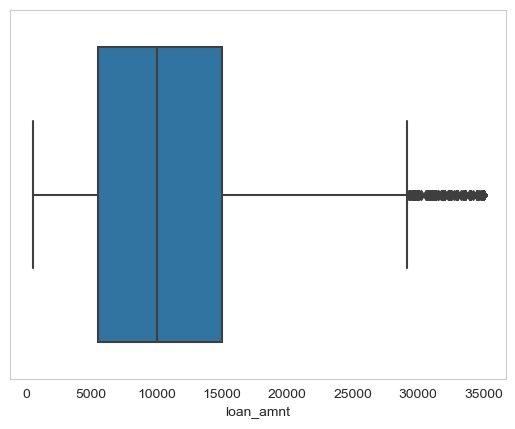

0.25     5500.0
0.50    10000.0
0.75    15000.0
0.90    21842.5
0.95    25000.0
0.99    35000.0
1.00    35000.0
Name: loan_amnt, dtype: float64

In [21]:
# Let's start with loan Amount

sb.boxplot(x=loanData['loan_amnt'], orient='v')
plt.show()
loanData.loan_amnt.quantile([0.25,0.5,0.75,0.90,0.95,0.99, 1.0])

# The distribution looks pretty contineous No need to remove a few outliers. Let's move on. 

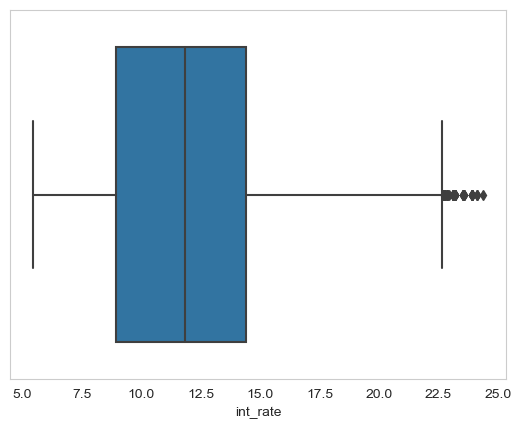

0.25     8.94
0.50    11.83
0.75    14.42
0.90    16.82
0.95    18.39
0.99    20.99
1.00    24.40
Name: int_rate, dtype: float64

In [22]:
# Let's see what Interest rate has to tell us

sb.boxplot(x=loanData['int_rate'], orient='v')
plt.show()
loanData.int_rate.quantile([0.25,0.5,0.75,0.90,0.95,0.99, 1.0])

# The distribution looks pretty contineous No need to remove a few outliers. Let's move on. 

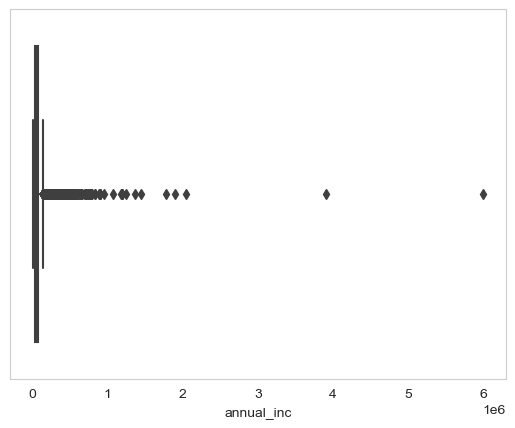

0.750      83000.0
0.900     116672.4
0.950     142000.0
0.970     166213.0
0.975     175000.0
0.980     189996.0
0.990     235000.0
1.000    6000000.0
Name: annual_inc, dtype: float64

In [23]:
# Let's plot annual income

sb.boxplot(x=loanData['annual_inc'], orient='v')
plt.show()
loanData.annual_inc.quantile([0.75,0.90,0.95,0.97,0.975,0.98, 0.99, 1.0])


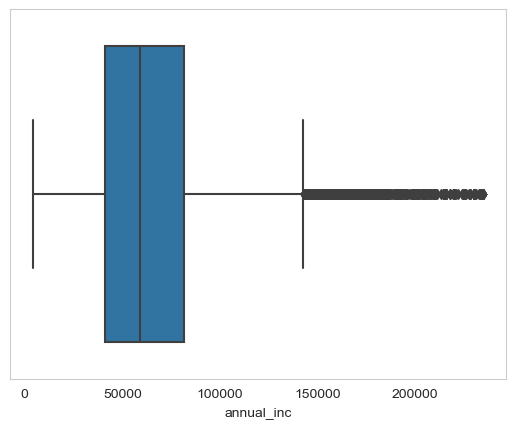

0.250     40944.000
0.500     59000.000
0.750     81708.000
0.900    112509.216
0.950    135000.000
0.970    150000.000
0.975    160000.000
0.980    168000.000
0.990    190000.000
1.000    235000.000
Name: annual_inc, dtype: float64

In [24]:
# Outliers totally screwed-up the distribution. The distribution looks pretty smooth till 98 percentile.
# Let's remove the data point(s) above 98 percentile and look at the distribution again

per99_annual_inc = loanData['annual_inc'].quantile(0.99)
loanData = loanData[loanData.annual_inc <= per99_annual_inc]

sb.boxplot(x=loanData['annual_inc'], orient='v')
plt.show()
loanData.annual_inc.quantile([0.25,0.5,0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])


In [25]:
average_annual_income = loanData['annual_inc'].mean()
print("Average Annual Income:", average_annual_income)

Average Annual Income: 65939.46155462299


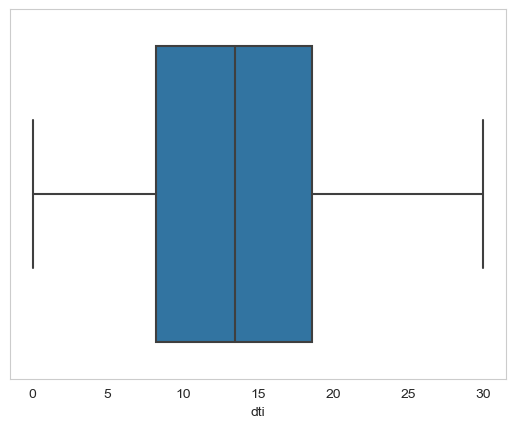

0.25     8.2400
0.50    13.4500
0.75    18.5900
0.90    22.3100
0.95    23.8100
0.99    26.5228
1.00    29.9900
Name: dti, dtype: float64

In [26]:
# Let's plot DTI now

sb.boxplot(x=loanData['dti'], orient='v')
plt.show()
loanData.dti.quantile([0.25,0.5,0.75,0.90,0.95,0.99, 1.0])

# The distribution looks pretty contineous No need to remove a few outliers. Let's move on. 

# 2: Analysing the data

In [27]:
# We have numerical as well as categorical data. We will bucket the numerical data as and when needed

## 2.1: Univariate Analysis

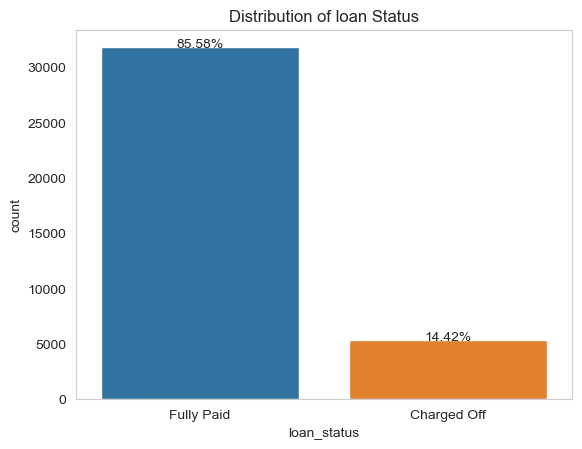

In [28]:
#2.1.1 Based on loan status

# Calculate the total count of records
total_records = len(loanData)

# Create the countplot
ax = sb.countplot(x='loan_status', data=loanData)
ax.set_title('Distribution of loan Status')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()

#Takeaway: Although the % of Charged off loans looks smaller, as per my research, 14.42% is still way high for any institution to sustain and keep lending

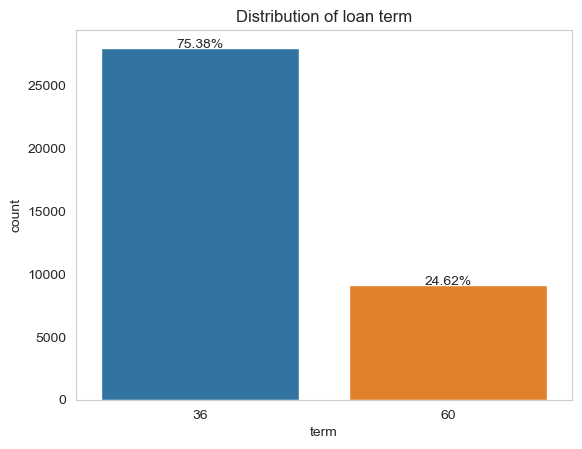

In [29]:
#2.1.2 Based on loan Term

# Create the countplot
ax = sb.countplot(x='term', data=loanData)
ax.set_title('Distribution of loan term')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show()

#Takeaway: 3/4th of loans are short term

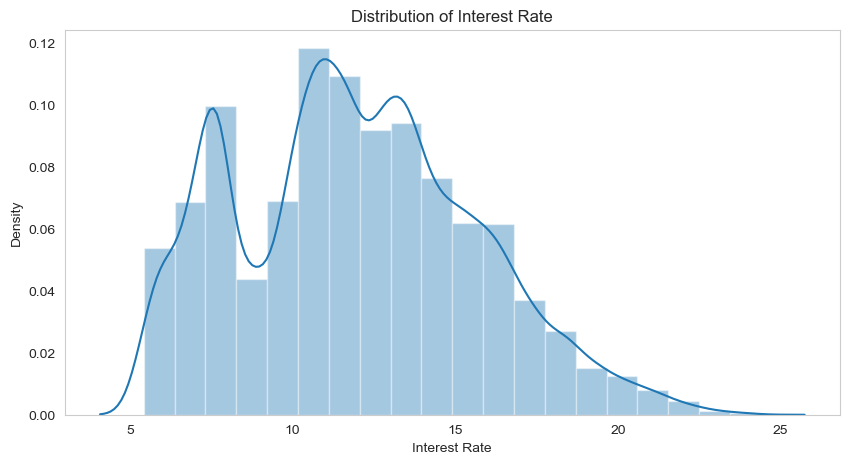

In [30]:
#2.1.3 Based on interest rate

plt.figure(figsize=(10,5))
sb.distplot(sorted(loanData.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Distribution of Interest Rate')
plt.show()

#Takeaway: Pretty consistent bell curve with an unsual looking drop near 9-10%

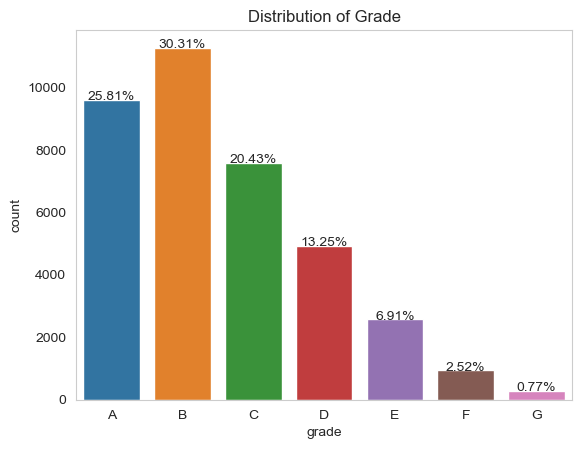

In [31]:
#2.1.4 Based on Grade

# Create the countplot
ax = sb.countplot(x='grade', data=loanData)
ax.set_title('Distribution of Grade')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')



#Takeaway: A, B and C grades consist of 3/4 of the loans

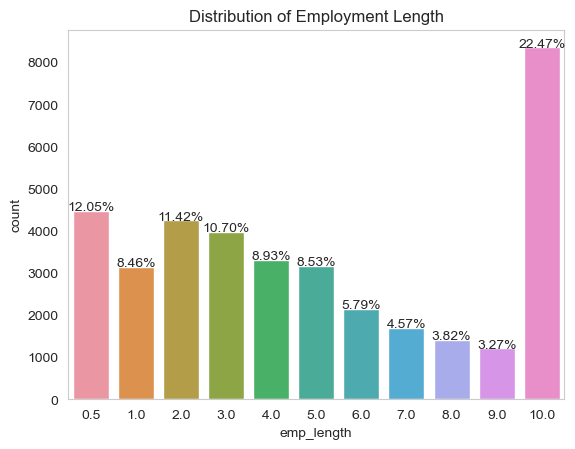

In [32]:
#2.1.5 Based on Employment length

# Create the countplot
ax = sb.countplot(x='emp_length', data=loanData)
ax.set_title('Distribution of Employment Length')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

#Takeaway: The employment lenght looks invesly proportional to the no of loans with an exception for employees with employment length of 10 years or more

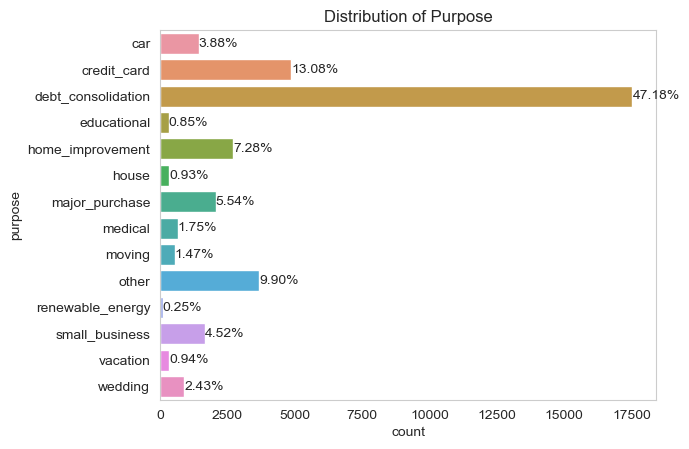

In [33]:
#2.1.6 Based on Purpose

ax = sb.countplot(y='purpose', data=loanData)
ax.set_title('Distribution of Purpose')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total_records)
    x = p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

# Show the plot
plt.show()

#Takeaway: Debt consolidation is by far the most common reason for taking loans. Credit card, others and home improvement are the other significant ones. It'll be interesting to see how Employment lenght relates to the purpose of the loan for Fully paid as well as CHarged off loans

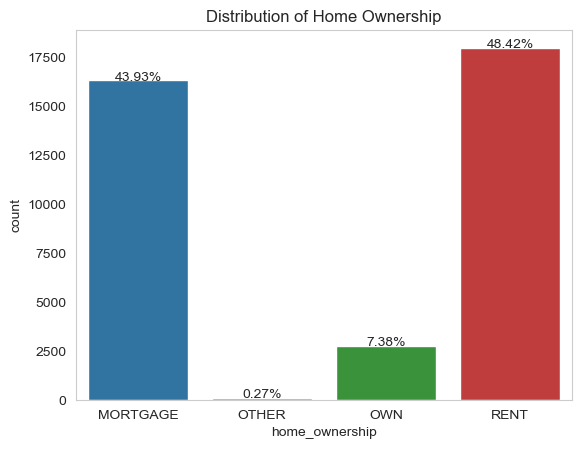

In [34]:
#2.1.7 Based on Home Ownership

#Since a very few "None" records exists for home ownership, let's merge it with Other
loanData['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

# Create the countplot
ax = sb.countplot(x='home_ownership', data=loanData)
ax.set_title('Distribution of Home Ownership')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

In [35]:
#Takeaway: People with Own houses have taken the least number of loans. 

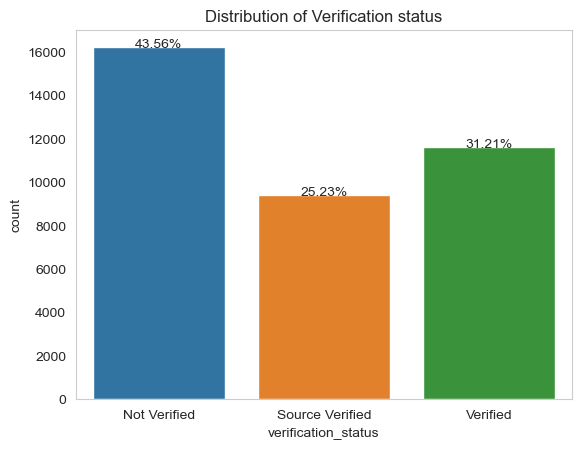

In [36]:
#2.1.8 Based on Verification status

# Create the countplot
ax = sb.countplot(x='verification_status', data=loanData)
ax.set_title('Distribution of Verification status')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

#Takeaway: Around 44% of the people aren't verified!!!

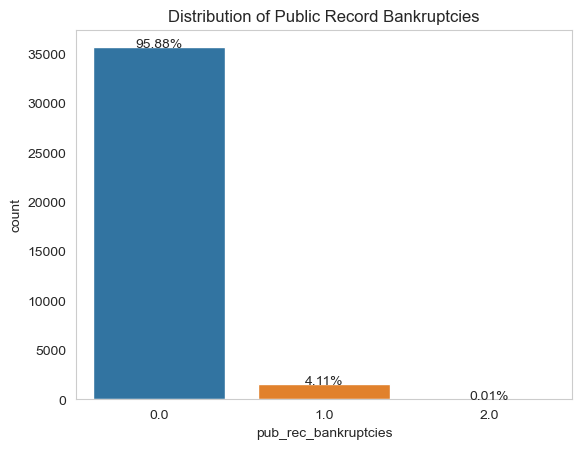

In [37]:
#2.1.9 Based on Public Record Bankruptcies

# Create the countplot
ax = sb.countplot(x='pub_rec_bankruptcies', data=loanData)
ax.set_title('Distribution of Public Record Bankruptcies')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

In [38]:
#Takeaway: A few of the people have bankrupcy record. Although 4.12% looks small, as per my research, it's a significant number.

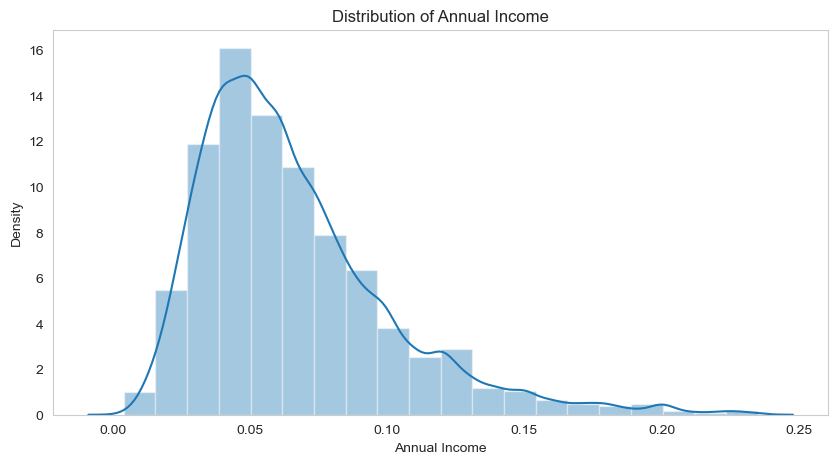

In [39]:
#2.1.10 Based on Annual Income

plt.figure(figsize=(10,5))
sb.distplot(sorted(loanData.annual_inc/1000000),kde=True,bins=20)
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.title('Distribution of Annual Income')
plt.show()

#Takeaway: MAjority of the people have lesser annual income

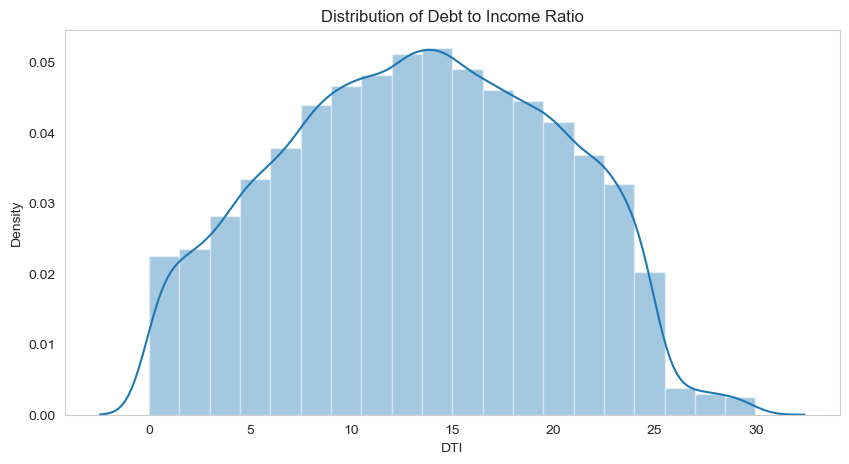

In [40]:
#2.1.11 Based on Debt to Income Ratio
plt.figure(figsize=(10,5))
sb.distplot(sorted(loanData.dti),kde=True,bins=20)
plt.xlabel('DTI')
plt.ylabel('Density')
plt.title('Distribution of Debt to Income Ratio')
plt.show()

#Takeaway: DTI peaks around 15 but overall, DTI for the distribution looks on the higher side. Comparing with annual income distribution, looks like people with lesser income have taken higher debts

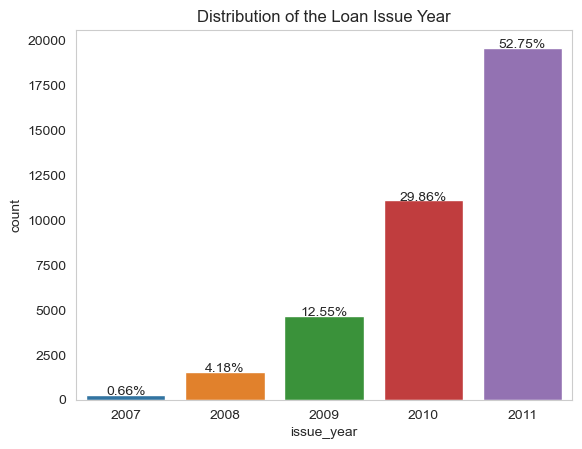

In [41]:
#2.1.12 Based on the Year the loan was issued

# Create the countplot
ax = sb.countplot(x = 'issue_year', data=loanData)
ax.set_title('Distribution of the Loan Issue Year')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

In [42]:
#Takeaway: The no of loans have gone up exponentially with each passing year

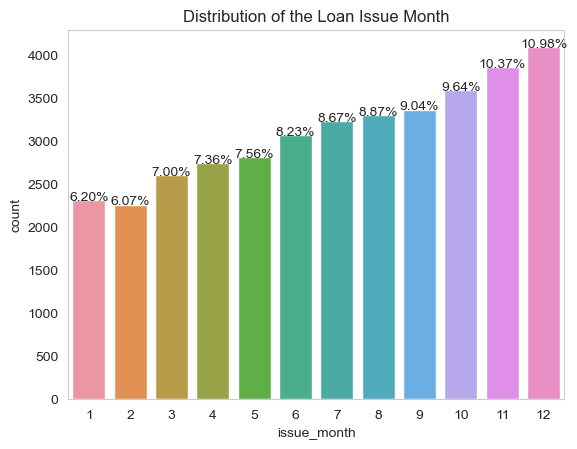

In [43]:
#2.1.12 Based on the Year the loan was issued

# Create the countplot
ax = sb.countplot(x = 'issue_month', data=loanData)
ax.set_title('Distribution of the Loan Issue Month')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total_records)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.5
    ax.annotate(percentage, (x, y), ha='center')

# Show the plot
plt.show() 

In [44]:
#Takeaway: More loans towards the end of the year!!!

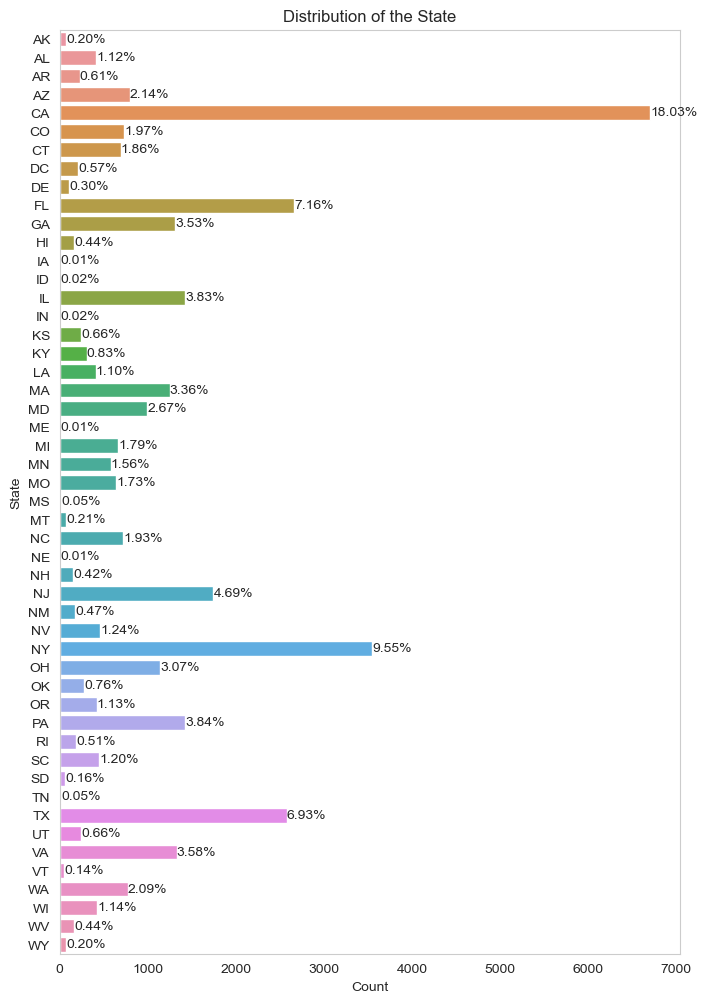

In [45]:
#2.1.13 Based on the State

# Set the figure size to increase height
plt.figure(figsize=(8, 12))

# Create the countplot with horizontal bars
ax = sb.countplot(y='addr_state', data=loanData)
ax.set_title('Distribution of the State')

# Annotate bars with the percentage of total count
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_width() / total_records)
    x = p.get_width() + 0.5
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), va='center')

# Set labels
plt.xlabel('Count')
plt.ylabel('State')

# Show the plot
plt.show()

In [46]:
#Takeaway: Majority of the borrowers are from larger states like CA, FL, NY and TX

## 2.2: Segmented Univariate Analysis

### Now, let's look at how each data point varies if we segment the data based on the loan status.

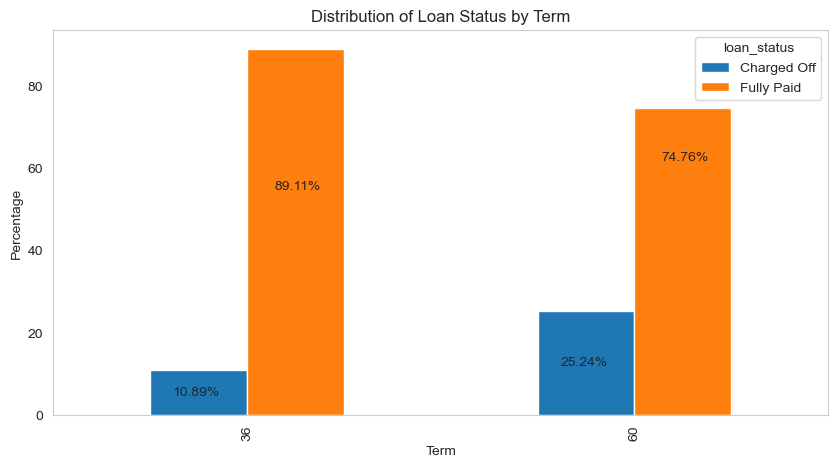

In [47]:
#2.2.1 Based on loan Term

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data = loanData.groupby(['term', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data.index):
    for col, percentage in grouped_data.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Term')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Term')

# Show the plot
plt.show()

#Takeaway: The probability of Charged Off loans is higher in the longer term loans

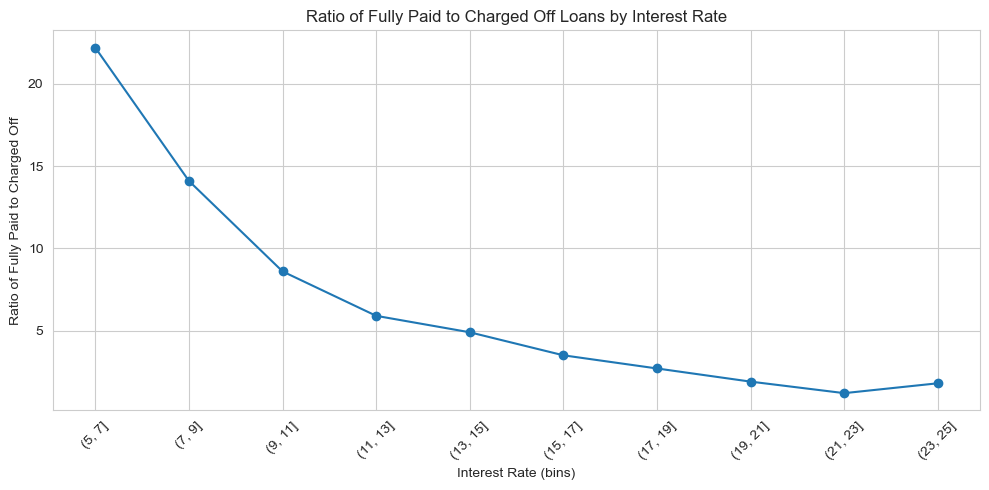

In [48]:
#2.2.2 Based on Rate on Interest

# Set font size
plt.rcParams.update({'font.size': 10})

# Discretize interest rates into bins
bins = np.arange(5, 31, 2)  # Define bin edges with larger intervals
loanData['int_rate_bin'] = pd.cut(loanData['int_rate'], bins=bins)

# Group by interest rate bins and loan_status, and check the unique values in 'loan_status' for each bin
grouped_data = loanData.groupby('int_rate_bin')['loan_status'].apply(lambda x: x.value_counts(normalize=True)).unstack()

# Calculate the ratio of "Fully Paid" to "Charged Off" loans for each bin
grouped_data['Ratio'] = grouped_data['Fully Paid'] / grouped_data['Charged Off']

# Format the ratio column to display only one decimal point
grouped_data['Ratio'] = grouped_data['Ratio'].apply(lambda x: round(x, 1))

# Convert the interval objects to string representations for plotting
grouped_data.reset_index(inplace=True)  # Reset index to access the 'int_rate_bin' column
grouped_data['int_rate_bin'] = grouped_data['int_rate_bin'].astype(str)

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(grouped_data['int_rate_bin'], grouped_data['Ratio'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Interest Rate (bins)')
plt.ylabel('Ratio of Fully Paid to Charged Off')
plt.title('Ratio of Fully Paid to Charged Off Loans by Interest Rate')

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


#Takeaway: The ratio of Fully Paid to Charged off loans decreases drastically with increase in the interest rate

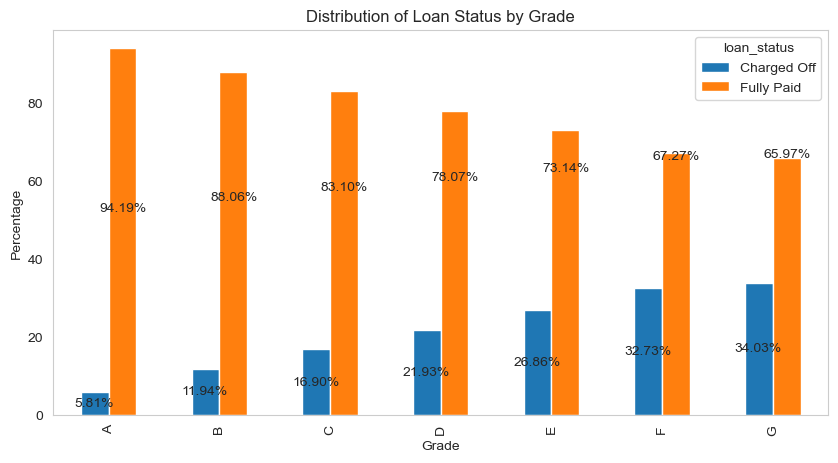

In [49]:
#2.2.3 Based on Grade

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data = loanData.groupby(['grade', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data.index):
    for col, percentage in grouped_data.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Grade')

# Show the plot
plt.show()

#Takeaway: The ratio of Fully Paid to Charged off loans decreases drastically with the High Risk loans (As we move from Grade A to Grade G, the risk increases)

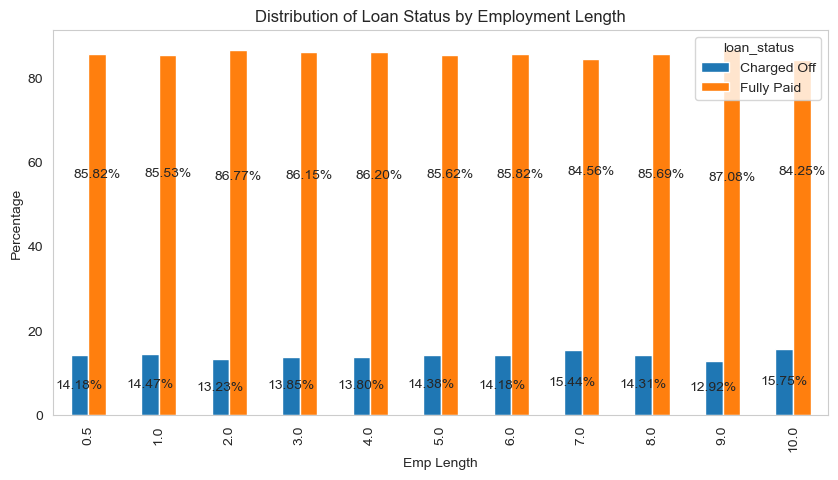

In [50]:
#2.2.4 Based on Employment Length

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data = loanData.groupby(['emp_length', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data.index):
    for col, percentage in grouped_data.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Emp Length')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Employment Length')

# Show the plot
plt.show()

In [51]:
#Takeaway: The ratio of Fully Paid to Charged off loans shows no significant difference for various emp length.

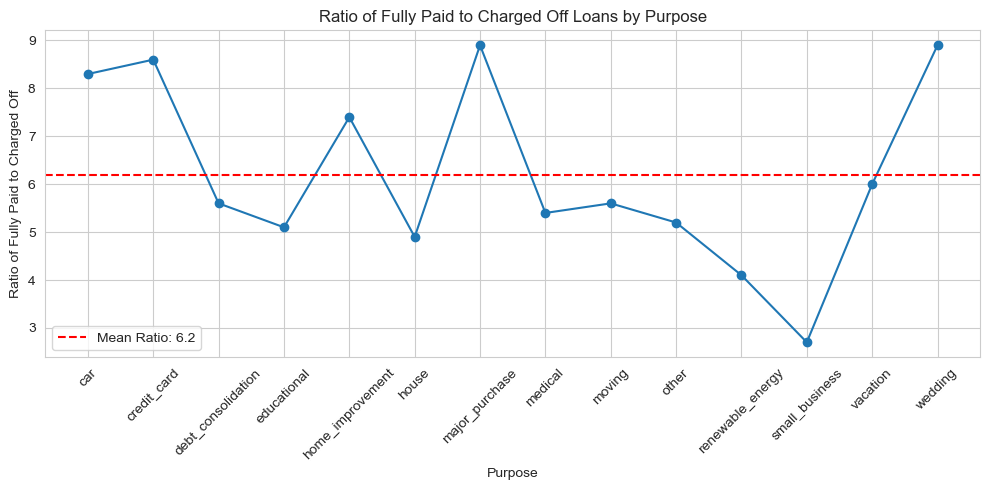

In [52]:
#2.2.5 Based on Purpose

# Group by purpose and loan_status, and check the unique values in 'loan_status' for each purpose
grouped_data_purpose = loanData.groupby('purpose')['loan_status'].apply(lambda x: x.value_counts(normalize=True)).unstack()

# Calculate the ratio of "Fully Paid" to "Charged Off" loans for each purpose
grouped_data_purpose['Ratio'] = grouped_data_purpose['Fully Paid'] / grouped_data_purpose['Charged Off']

# Format the ratio column to display only one decimal point
grouped_data_purpose['Ratio'] = grouped_data_purpose['Ratio'].apply(lambda x: round(x, 1))

# Reset index to access the 'purpose' column
grouped_data_purpose.reset_index(inplace=True)

mean_ratio = grouped_data_purpose['Ratio'].mean()

# Plot the line graph
plt.figure(figsize=(10, 5))
plt.plot(grouped_data_purpose['purpose'], grouped_data_purpose['Ratio'], marker='o', linestyle='-')

# Plot horizontal line for mean ratio
plt.axhline(y=mean_ratio, color='r', linestyle='--', label=f'Mean Ratio: {mean_ratio:.1f}')

# Set labels and title
plt.xlabel('Purpose')
plt.ylabel('Ratio of Fully Paid to Charged Off')
plt.title('Ratio of Fully Paid to Charged Off Loans by Purpose')

# Show the legend
plt.legend()

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#Takeaway: The ratio of Fully Paid to Charged off loans varies based on the Purpose. A larger majority of people who took the loan for Major Purchases, Credit Card, Cars and Wedding paid their loans back while the loans taken for Small business did the worst.

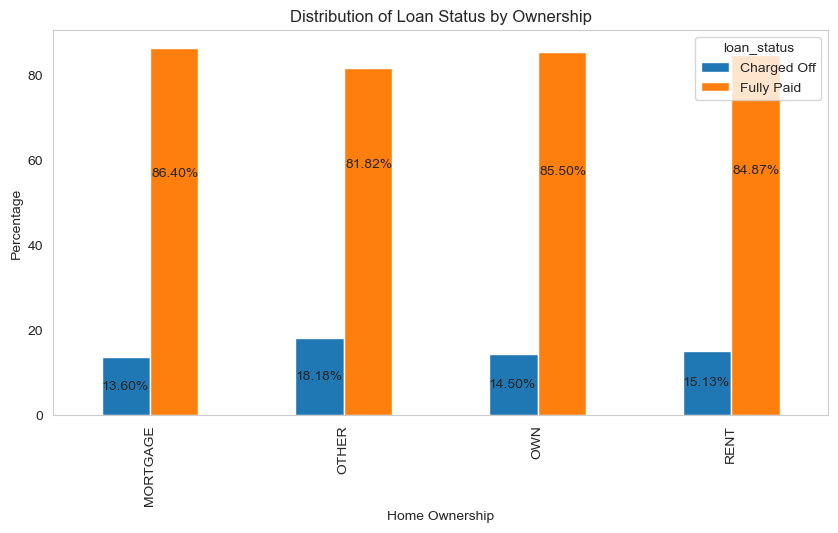

In [53]:
#2.2.6 Based on Home Ownership

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data_ownership = loanData.groupby(['home_ownership', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_ownership.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_ownership.index):
    for col, percentage in grouped_data_ownership.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_ownership.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Ownership')

# Show the plot
plt.show()

In [54]:
#Takeaway: The ratio of Fully Paid to Charged off loans shows no significant difference. Let's plot a line chart to confirm

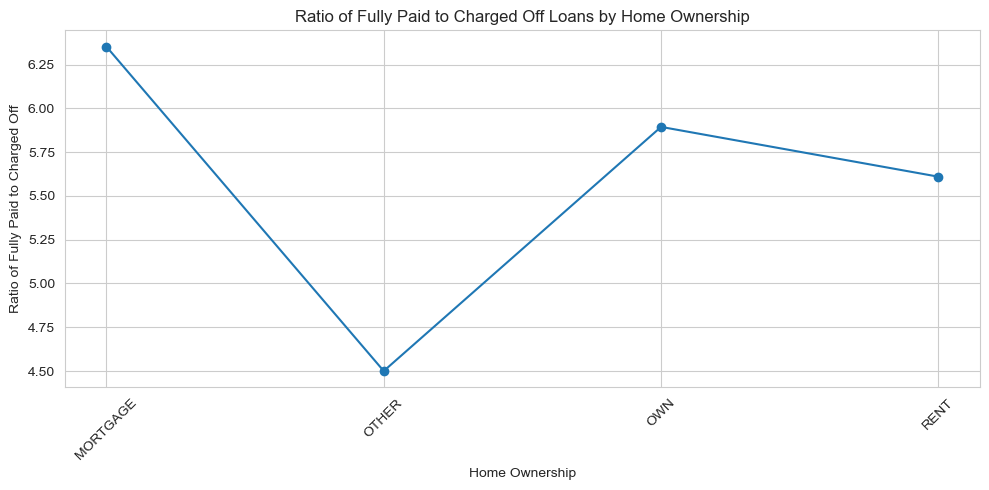

In [55]:
# Calculate the ratio of "Fully Paid" to "Charged Off" loans for each group
grouped_data_ownership['Ratio'] = grouped_data_ownership['Fully Paid'] / grouped_data_ownership['Charged Off']

# Plot the line graph for the ratio
plt.figure(figsize=(10, 5))
plt.plot(grouped_data_ownership.index.get_level_values('home_ownership'), grouped_data_ownership['Ratio'], marker='o', linestyle='-')

# Set labels and title
plt.xlabel('Home Ownership')
plt.ylabel('Ratio of Fully Paid to Charged Off')
plt.title('Ratio of Fully Paid to Charged Off Loans by Home Ownership')

# Show the plot
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#Takeaway: The ratio of Fully Paid to Charged off loans doesn't show a significant variation with an exception of OTher loan that are very less

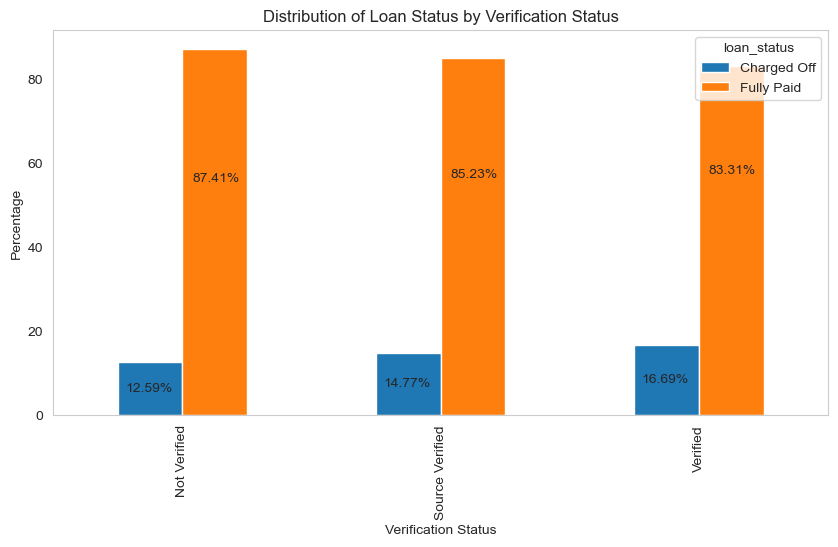

In [56]:
#2.2.7 Based on Verification Status

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data_ownership = loanData.groupby(['verification_status', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_ownership.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_ownership.index):
    for col, percentage in grouped_data_ownership.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_ownership.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Verification Status')

# Show the plot
plt.show()

In [57]:
#Takeaway: The ratio of Fully Paid to Charged off loans shows little change for verification status

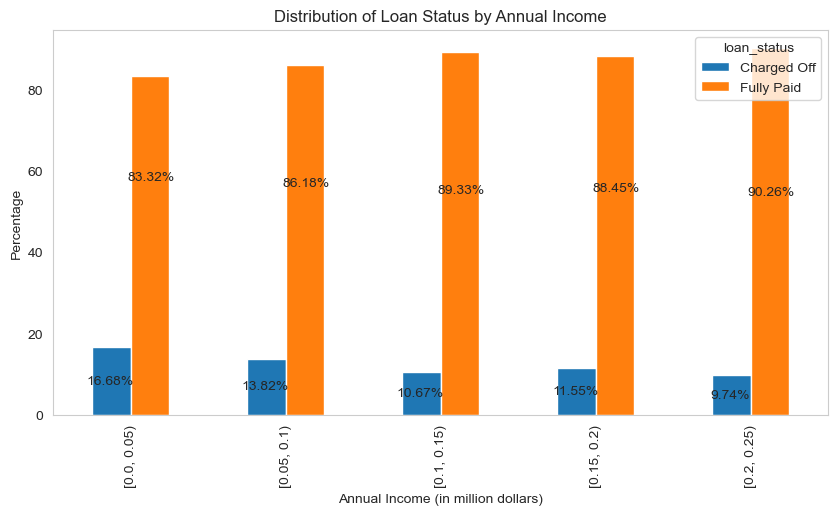

In [58]:
#2.2.8 Based on Annual Income

# Set font size
plt.rcParams.update({'font.size': 10})

# Convert annual income to million dollars
loanData['annual_inc_million'] = loanData['annual_inc'] / 1_000_000

# Discretize annual income into bins
bins = [0, 0.05, 0.1, 0.15, 0.2, 0.25]  # Define bin edges in million dollars
loanData['annual_inc_bin'] = pd.cut(loanData['annual_inc_million'], bins=bins, right=False)

# Group by annual income bins and loan_status, and check the unique values in 'loan_status' for each bin
grouped_data_income = loanData.groupby(['annual_inc_bin', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_income.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_income.index):
    for col, percentage in grouped_data_income.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_income.loc[row].cumsum()[col] - percentage / 2
        if pd.notna(x) and pd.notna(y):  # Ensure x and y are not NaN
            ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Annual Income (in million dollars)')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Annual Income')

# Show the plot
plt.show()


#Takeaway: The ratio of Fully Paid to Charged off loans shows borrowers with Higher salary are more likely to pay their loans back

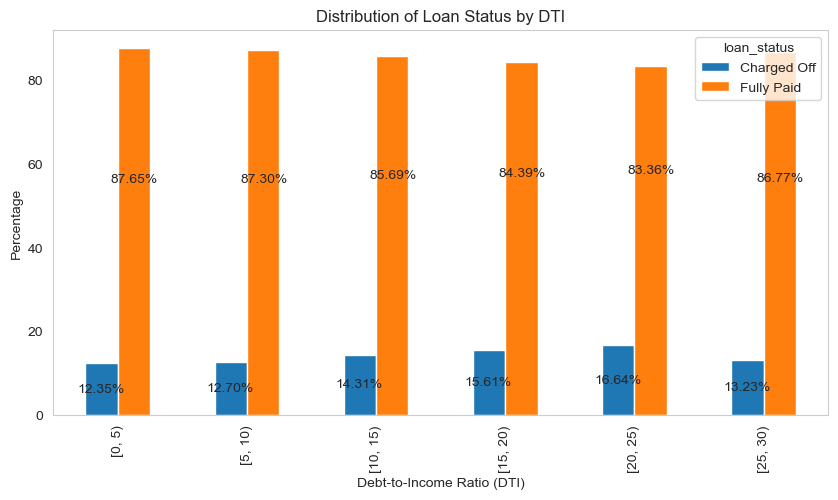

In [59]:
#2.2.9 Based on DTI

# Set font size
plt.rcParams.update({'font.size': 10})

# Discretize DTI into bins
bins = [0, 5, 10, 15, 20, 25, 30]  # Define bin edges for DTI
loanData['dti_bin'] = pd.cut(loanData['dti'], bins=bins, right=False)

# Group by DTI bins and loan_status, and check the unique values in 'loan_status' for each bin
grouped_data_dti = loanData.groupby(['dti_bin', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_dti.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_dti.index):
    for col, percentage in grouped_data_dti.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_dti.loc[row].cumsum()[col] - percentage / 2
        if pd.notna(x) and pd.notna(y):  # Ensure x and y are not NaN
            ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Debt-to-Income Ratio (DTI)')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by DTI')

# Show the plot
plt.show()


#Takeaway: The ratio of Fully Paid to Charged off loans shows borrowers with Higher DTI are more likely to default on their loans

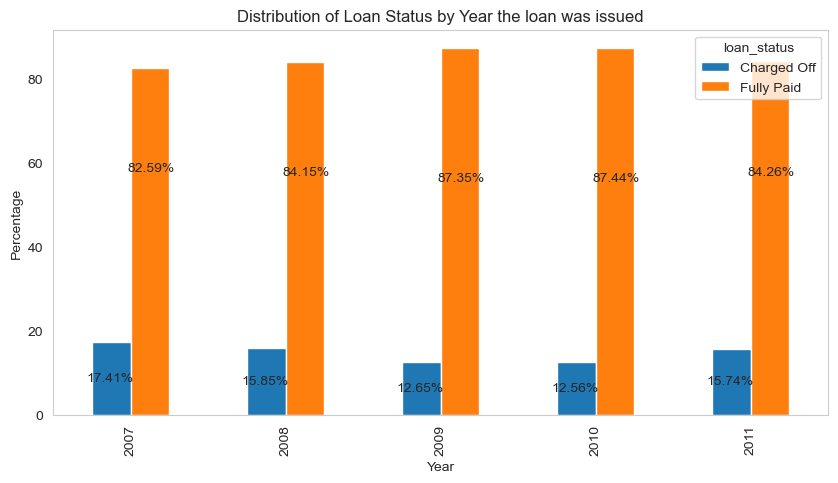

In [60]:
#2.2.10 Based on Year the loan was issued

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data_ownership = loanData.groupby(['issue_year', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_ownership.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_ownership.index):
    for col, percentage in grouped_data_ownership.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_ownership.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Year the loan was issued')

# Show the plot
plt.show()

#Takeaway: The ratio of Fully Paid to Charged off loans shows variation by issued year. It was highest in 2007. It came down during the tough economic conditions of 2008, 2009.. Again went up in 2011. I don't want to see the absolute number is the no of loans given were way too high in 2011 as compared to other years.

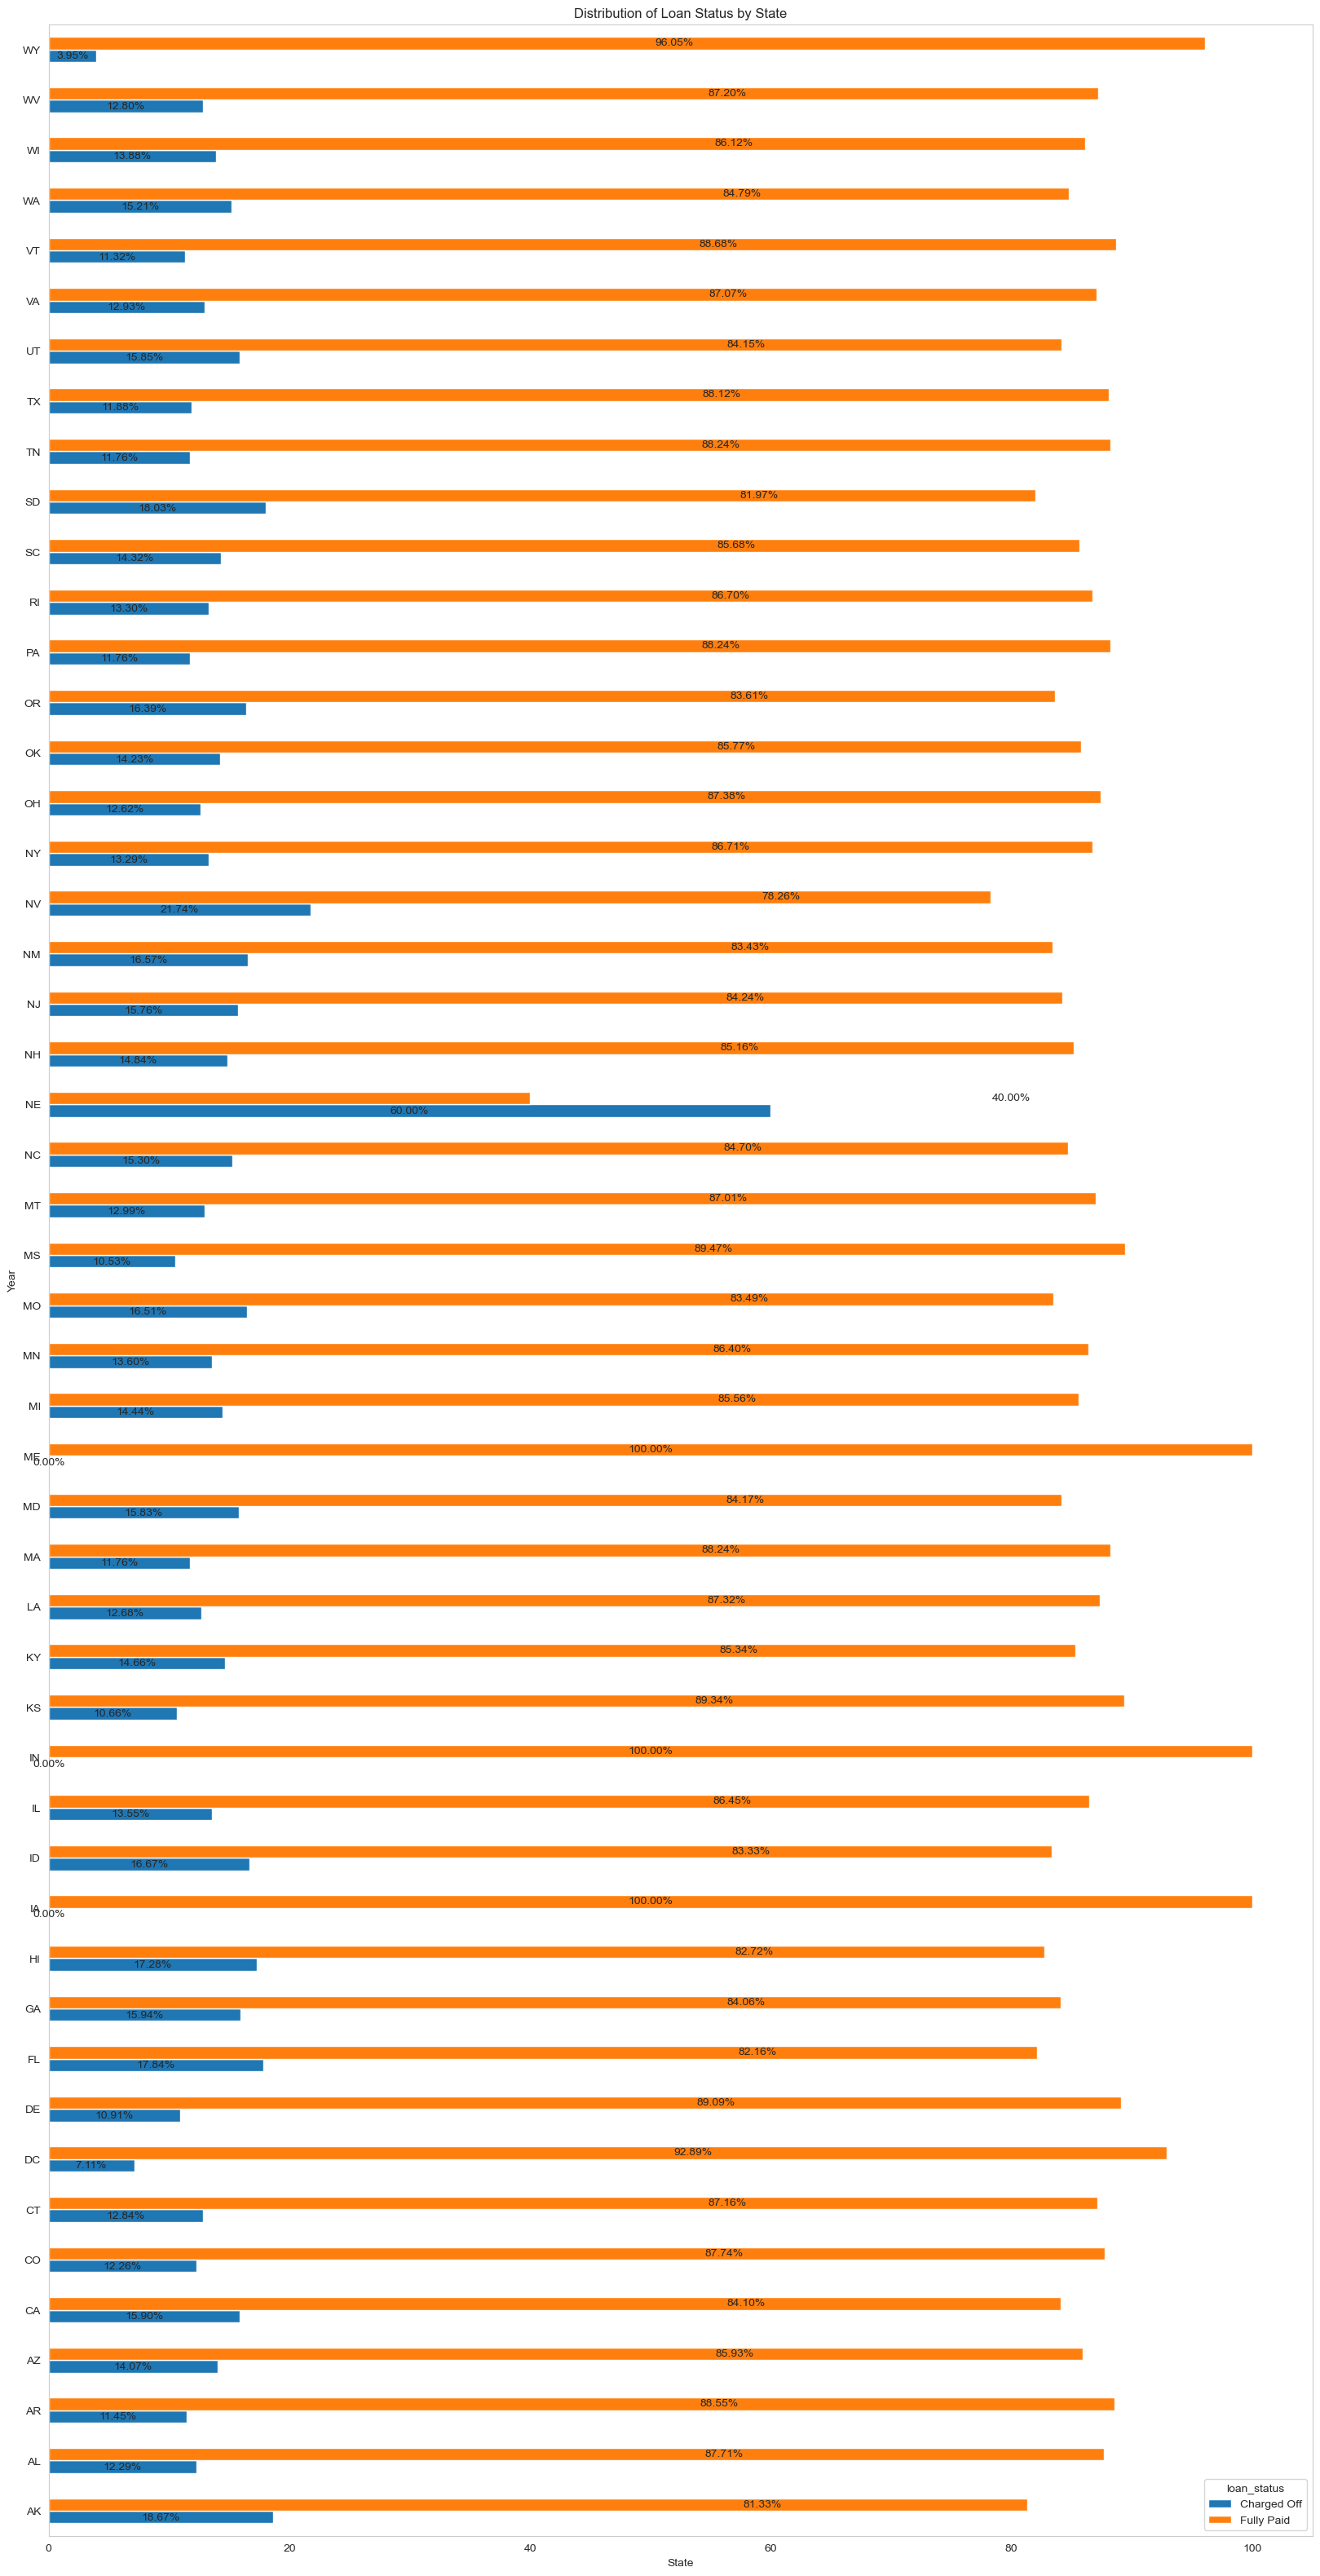

In [61]:
#2.2.11 Based on State


# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data_ownership = loanData.groupby(['addr_state', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_ownership.plot(kind='barh', figsize=(20, 40))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_ownership.index):
    for col, percentage in grouped_data_ownership.loc[row].iteritems():
        # Adjust y-coordinate to place the percentage at the end of the bar
        y = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage horizontally within each bar
        x = grouped_data_ownership.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('State')
plt.ylabel('Year')
plt.title('Distribution of Loan Status by State')

# Show the plot
plt.show()


In [62]:
#Takeaway: The ratio of Fully Paid to Charged off loans for borrowers from a few states (WY, ME, IN, LA) is very low while for NE it's unusually high (60%)

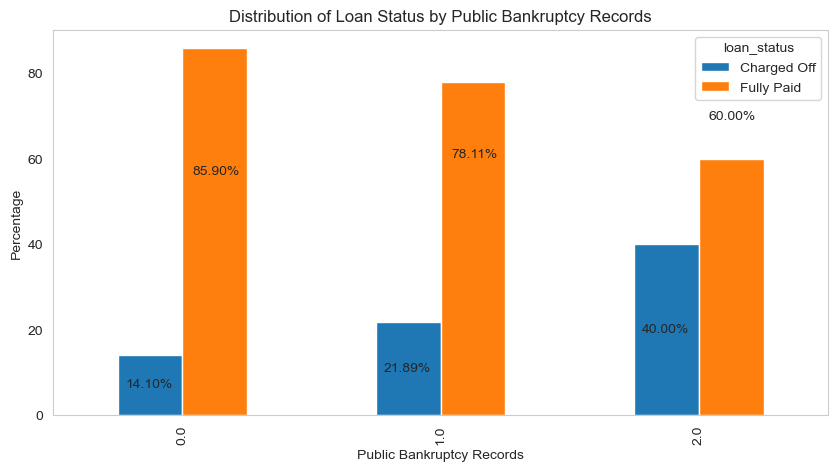

In [63]:
#2.2.12 Based on Public Bankruptcy Records  

# Set font size
plt.rcParams.update({'font.size': 10})

# Calculate total count of records
total_records = len(loanData)

# Group by term and loan_status, and calculate the percentage for each group
grouped_data_ownership = loanData.groupby(['pub_rec_bankruptcies', 'loan_status']).size().unstack().apply(lambda x: x / x.sum(), axis=1) * 100

# Create the plot
ax = grouped_data_ownership.plot(kind='bar', figsize=(10, 5))

# Annotate bars with the percentage of each loan status
for idx, row in enumerate(grouped_data_ownership.index):
    for col, percentage in grouped_data_ownership.loc[row].iteritems():
        # Adjust x-coordinate to place the percentage at the end of the bar
        x = idx + 0.13 * (col == 'Fully Paid') - 0.13 * (col == 'Charged Off') # Move Fully Paid bar slightly to the right
        # Center the percentage vertically within each bar
        y = grouped_data_ownership.loc[row].cumsum()[col] - percentage / 2
        ax.text(x, y, f'{percentage:.2f}%', ha='center', va='center')

# Set labels and title
plt.xlabel('Public Bankruptcy Records')
plt.ylabel('Percentage')
plt.title('Distribution of Loan Status by Public Bankruptcy Records')

# Show the plot
plt.show()

In [64]:
#Takeaway: The ratio of Fully Paid to Charged off loans for borrowers with One or more bankruptcy record is very low. Avoid such borrowers.

## 2.3: Bivariate Analysis

### Now let's look for the variables that have most dependencies on each other

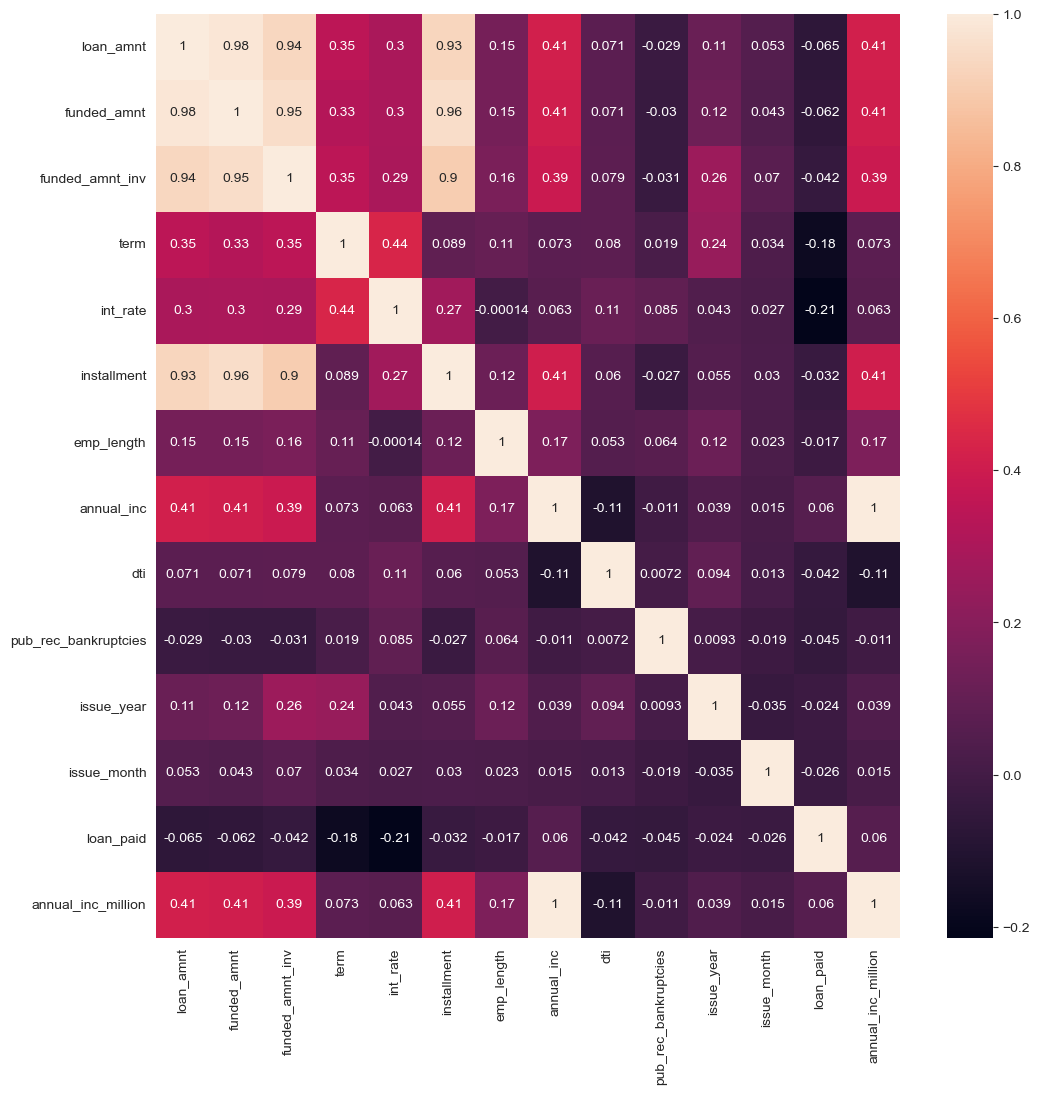

In [65]:
# Let's start with a heat map of the data

plt.figure(figsize=(12,12))
sb.heatmap(loanData.corr(),annot=True)
plt.show()

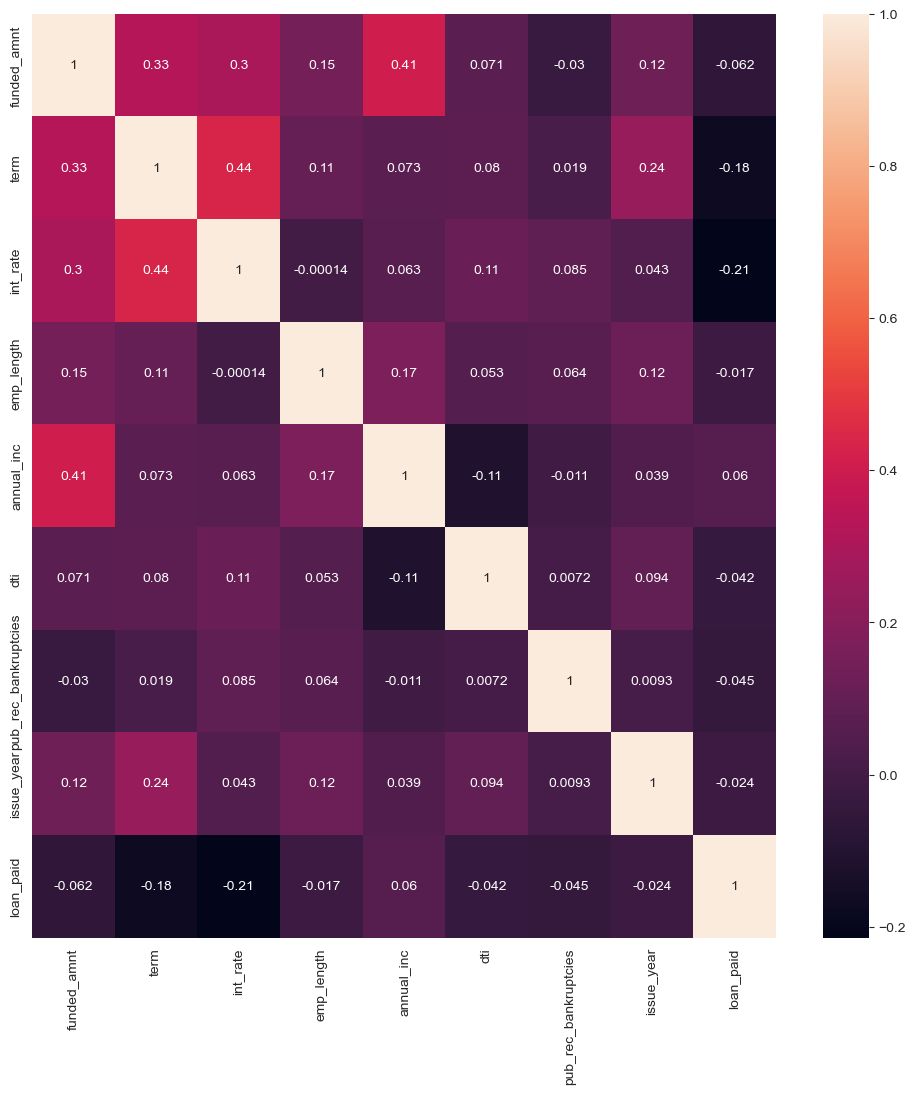

In [66]:
# Let's remove funded_amnt_inv and loan_amnt fields as they have high correlation with funded_amnt and plot the map again. 
# Remove a couple of other useless fields as well
loanData.drop(['funded_amnt_inv', 'loan_amnt','annual_inc_million','issue_month','installment'], axis=1, inplace=True)

plt.figure(figsize=(12,12))
sb.heatmap(loanData.corr(),annot=True)
plt.show()

# 3: Key Observations

## 3.1: Univariate Analysis

In [67]:
#1. Charged off loans are very high as per industry standards

#2. Interest rates distribution follow a bell curve with a slight drop around 9-10%

#3. Majority of the loans are:
#    a. A,B,C Grade
#    b. Given for Debt consolidation followed by Credit card, others and home improvement
#    c. Given to people with no bankrupcy record
#    d. Gievn to people with income on the lower side and DTI on the higher side
#    e. Given to people from larger states like CA, FL, NY and TX
#    f. Given to Verified people
#    g. Given to people without their own house
#    h. People with less work experience

#4. The number of loans have gone up exponentially with each passing year

#5. More loans are given towards the end of the year

#6. For Annual Income:
#   a. Mean = 62633
#   b. Median = 58000 

## 3.2: Segmented Univariate Analysis

In [68]:
#1. The probability of default is higher in case of:
#    a. Longer Term
#    b. Increased Interest Rate
#    c. Lower Grade loans
#    d. Purpose = Major Purchases, Credit Card, Cars and Wedding
#    e. Higher Salary
#    f. Loans issued in 2009 and 2010 
    
    
#2. The probability of default is Lower in case of:
#    a. Purpose = Small Business
#    b. High DTI

#3. The probability of default showed insignificant dependence on
#    a. Employment Length
#    b. Ownership of House
#    c. Verification Status
#    d. Employment Length
    

## 3.3: Bivariate Analysis

In [69]:
#1. No very strong correlation found (+ve as well as -ve)

#2. Loan being fully paid is:
#    a. Negatively Correlated to:
#       i. Interest Rate
#       ii. Term

#3. DTI is:
#    a. Negatively Correlated to:
#       i. Annual Income

#3. Interest is:
#    a. Positively Correlated to:
#       i. Term
#       ii. Funded Amount

#4. Funded Amount is:
#    a. Positively Correlated to:
#       i. Annual Income
#       ii. Term
